# Исследование данных о российском кинопрокате

**Заказчик** - Министерство культуры Российской Федерации.

**Цель** -  изучение рынка российского кинопроката и выявление текущих трендов, в частности, интерес зрителей к фильмам с   государственной поддержкой.

**Входные данные от Заказчика**: 
- набор данных, содержащих информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск в двух файлах:
  - `/datasets/mkrf_movies.csv` — данные о прокатных удостоверениях;
  - `/datasets/mkrf_shows.csv` — данные о прокате в российских кинотеатрах.

### Описание данных
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма,уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

***План исследования:***

**1.** *Изучение файлов с данными и объединение их в один датафрейм таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.*

**2.** *Предобработка данных*
- Проверка типов данных в датафрейме и преобразование там, где это необходимо.
- Изучение пропусков в датафрейме с объяснением, почему заполнили пропуски определённым образом или почему не стали это делать.
- Проверка, есть ли в данных дубликаты. Описание причины, которые могли повлиять на появление дублей.
- Изучение столбцов, которые содержат категориальные значения:
  - Выявить, какая общая проблема встречается почти во всех категориальных столбцах;
  - Исправление проблемных значений в поле type.
- Изучение столбцов, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
- Добавить новые столбцы:
- Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма;
- Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
- Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.

**3.** *Исследовательский анализ данных*
- Выявить, сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
- Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.
- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**4.** *Исследование фильмов, которые получили государственную поддержку*
- Поиск интересных закономерностей в данных. Посмотреть, сколько выделяют средств на поддержку кино. Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**5.** *Общий вывод*

### Изучение файлов с данными и объединение их в один датафрейм 



In [1]:
#Импортируем библиотеки
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
df_movies = pd.read_csv('/datasets/mkrf_movies.csv') #распакуем файл
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Получим сведения о типах данных столбцов в таблице с информацией из реестра прокатных удостоверений и в таблице показов фильмов в российских кинотеатрах.

In [2]:
#возпользуемся методом 'info()'
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [3]:
#Получим сведения о типах данных столбцов методом 'info()'
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Из полученных сведений видно, что обе таблицы содержат столбцы с одинаковым именем `puNumber`. Для объединения таблиц в одну необходимо привести эти столбцы к одному типу данных.

In [4]:
# Переведем столбец 'puNumber' в таблице о показах из целого в строчный
df_shows['puNumber'] = df_shows['puNumber'].astype('str')
df_movies['puNumber'] = df_movies['puNumber'].astype('str')
# проверим
df_shows.dtypes

puNumber       object
box_office    float64
dtype: object

Объединим две таблицы в один датасет.

In [5]:
#используем метод 'merge()' по столбцу 'puNumber'
df= df_movies.merge(df_shows, on='puNumber', how='outer')

Еще раз посмотрим на сводку числовых значений в нашем объединенном наборе данных.

In [6]:
#Применим метод 'info()'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


Выведем случайную выборку из 5 строк, чтобы посмотреть, что содержит таблица, какие столбцы, какие значения.

In [7]:
 #cгенерируем выборочные случайные строки таблицы
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1991,Смайлик,111008614,2014-08-08T12:00:00.000Z,Художественный,"ООО ""Продюсерская кинокомпания ""Киномир""",Россия,Т.Аленикова,Т.Яковенко,«16+» - для детей старше 16 лет,0.0,25000000.0,36259500.0,Министерство культуры,6.8,мелодрама,554251.0
4699,Женщина-кошка,221167710,2010-12-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Пикчерз, Ди Но...",США-Австралия,Питоф,"Эдвард Л.Макдоннелл, Дэниз Ди Нови",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"фэнтези,боевик,криминал",NaN
6224,Пятерочка выручает. Великая речь на Доргомилов...,112008218,2018-09-09T12:00:00.000Z,Документальный,Кашинцева Елизавета Сергеевна,Россия,Е.Кашинцева,Е.Кашинцева,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,Влюбленные_,121028112,2012-11-09T12:00:00.000Z,Художественный,"Ти Эн Вей О, Делюкс Продюксьон, Бэ Дэ Эс, Бана...",Франция - Люксембург - Германия - Бельгия - Шв...,Гленио Бондер,"Боб Беллион, Джимми Де Брэбэнт",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.5,"драма,мелодрама",NaN
7149,Нет бога кроме меня (Ийэкээм),111013319,2019-08-09T12:00:00.000Z,Художественный,"ООО ""Тарагай Синема""",Россия,Д.Давыдов,"С.Саввина, С.Шишигин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,2532679.0


Необходимо проверить названия столбцов на наличие ошибок и корректные наименования.

In [8]:
# Просмотрим названия столбцов на наличие ошибок
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Посмотрим предварительные статистические сведения, они включают в себя такие позиции, как среднее, медиана, количество и т.д., для количественных значений.

In [9]:
df.describe().T #выведем статистические сведения

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,30000000.00,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,68649916.00,1.419853e+08,2.305074e+09
box_office,3158.0,7.647870e+07,2.403531e+08,0.0,86239.0,2327987.55,2.397967e+07,3.073569e+09


Рассмотрим уникальные значения данных выборочно.

In [10]:
#рассмотрим уникальные значения данных выборочно и преобразуем для наглядности при помощи to_frame
display(df['puNumber'].value_counts().to_frame())
display(df['film_studio'].value_counts().to_frame())   
display(df['ratings'].value_counts().to_frame())
display(df['type'].value_counts().to_frame())

,puNumber
221154310,2
221054410,2
221090310,1
121018610,1
221017116,1
...,...
126001812,1
221072214,1
121028919,1
111016616,1


,film_studio
"Киностудия ""Мосфильм""",341
"ООО ""Мульт в кино""",57
Анимаккорд Лтд,23
"ООО ""Мульт в кино""",18
"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",16
...,...
"Уорнер Бразерс, Кастл Рок Интертейнмент, Шрёдер/Хоффман Продакшн",1
"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филмз, АйЭнСиЭйЭй",1
"АНО ""Киностудия ""Гранат""",1
"Бляйберг Интертейнмент, Миллениум Филмз, Ню Имаджес",1


,ratings
6.6,312
6.7,308
6.8,261
7.2,252
6.2,243
...,...
9.1,1
28%,1
90%,1
1.3,1


,type
Художественный,4520
Художественный,1389
Анимационный,828
Прочие,406
Документальный,288
Научно-популярный,53
Музыкально-развлекательный,1
Анимационный,1


#### Вывод
Объединили две таблицы данных в одну, предварительно поменяв тип данных в столбце `puNumber`.
Ошибок в названиях столбцов не обнаружено.
В новой таблице 16 столбцов, из них 4 столбца по типу данных имеют числовые значения, остальные строчные.

Необходимо преобразовать столбцы по типу данных:

*- в целое число*
- `puNumber`- потому что номер;
- `refundable_support`, `nonrefundable_support`, `budget` - копейки не нужны

*- со строчного на дату*
- `show_start_date`

*- со строчного на вещественное*
- `ratings`


Визуально обнаружены:
- дубликаты в столбцах `type` и `film_studio`;
- задвоенные номера прокатных удостоверений;
- процентное соотношения рейтинга вместо числового.

Во всех столбцах присутствуют пропуски.

### Предобработка данных

####  Проверка типов данных



Заменим типы данных в столбцах `show_start_date`, `refundable_support`, `nonrefundable_support`, `budget`, `puNumber`, `box_office`, `ratings`. Это необходимо для дальнейшей корректной обработки данных.

In [11]:
# заменим тип данных по дате премьеры фильма со строчного на datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT')

In [12]:
# изменим тип значений 
df['refundable_support'] = df['refundable_support'].astype('Int64')
df['nonrefundable_support'] = df['nonrefundable_support'].astype('Int64')
df['budget'] = df['budget'].astype('Int64')


In [13]:
#заменим тип данных, предварительно преобразуя из строчного в вещественный
df['puNumber'] = pd.to_numeric(df['puNumber'], errors='coerce')
df['puNumber'] = df['puNumber'].astype('Int64')

In [14]:
#заполним пропуски 0 и заменим тип данных
df['box_office'] = df['box_office'].fillna(0).astype(np.int64, errors='ignore')

In [15]:
#заменим тип данных,удалив процент
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [16]:
#заменим тип данных,копейки нам не важны, предварительно заполнив пропуски нулём, т.к. нет денег-это нет денег
df1 = df[['refundable_support', 'nonrefundable_support', 'budget']]
df[df1.columns] = df1.apply(lambda x: x.fillna(0).astype(np.int64, errors='ignore'))
                               

Проверим, всё ли преобразовалось, как требовалось.

In [17]:
#Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null Int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               7486 non-null int64
dtypes: Int64(1), datetime64[ns, UTC](1), float64(1), int64(4), object(9)
memory usage: 1001.5+ KB


#####  Вывод
Изменили типы значений почти  во всех столбцах. Параллельно заполнили пропуски в денежных столбцах.

#### Обработка пропусков в датафрейме



Изучим процентное соотношение всех пропусков таблицы, а далее обработаем эти пропуски в столбцах. 

In [18]:
#Посмотрим на процентное соотношение всех пропущенных значениях по всему датасету
round((df.isnull().sum().sort_values()/df.shape[0])*100, 2)

title                     0.00
show_start_date           0.00
type                      0.00
age_restriction           0.00
refundable_support        0.00
nonrefundable_support     0.00
budget                    0.00
box_office                0.00
puNumber                  0.01
production_country        0.03
director                  0.12
film_studio               0.24
producer                  7.59
genres                   13.04
ratings                  13.30
financing_source         95.57
dtype: float64

In [19]:
#заменим пропуски в категориальных столбцах более лаконичным, чем "nan", "unknown" 
df2 = df[['production_country', 'director', 'film_studio', 'producer', 'genres', 'financing_source']]
df[df2.columns] = df2.apply(lambda x: x.fillna('unknown'))

In [20]:
df['ratings'] = df['ratings'].fillna(0)


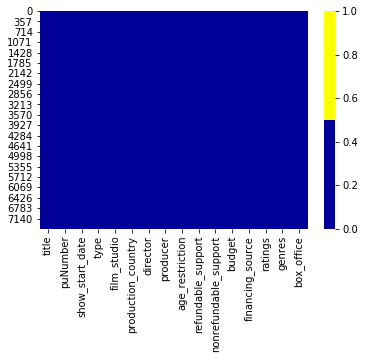

In [21]:
#визуализируем пропущенные значения с помощью тепловой карты
cols = df.columns[:16] 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

##### Вывод
Заполнили пропуски в категориальных столбцах на 'unknown',т.к. иформацию нам взять негде и, чтобы не смущали 'nan'.

 А вот пропуски в рейтинге решено заменить на ноль, на медиану заменять неправильно, среднее тоже, информацию взять негде, а 'nan' и ноль схожие значения в данном случае.

#### Проверка на наличие дубликатов в датафрейме


In [22]:
#проверим наличие дубликатов
df.duplicated(keep = False).sum()

0

##### Вывод
Дубликатов нет, хотя визуально в 1 разделе наблюдали. Значит, это либо техническая ошибка, либо ошибка записи.
Рассмотрим подробнее далее.

#### Изучение категориальных значений



Изучим столбцы, которые содержат категориальные значения.


Выведем уникальные значения типов фильмов.

In [23]:
#воспользуемся методом
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

А вот и ошибка записи- лишние пробелы.

Удалим эти ненужные пробелы в столбце `type`, заодно удалим во всех категориальных столбцах пробелы, если таковые имеются.

In [24]:
#удалим пробелы в наименованиях
df['type'] = df['type'].str.strip()

In [25]:
#проверим
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [26]:
#удалим во всех категориальных столбцах пробелы, если таковые имеются
df2 = df[['production_country', 'director', 'film_studio', 'producer', 'genres', 'financing_source']]
df[df2.columns] = df2.apply(lambda x: x.str.strip()).astype('str', errors='ignore')
#посмотрим выборочно
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

##### Вывод
Нашли ошибку в записи типов фильмов - лишние пробелы, удалили, и также преобразовали остальные категориальные столбцы.

#### Проверка количественных значений



Изучим столбцы, которые хранят количественные значения. Проверим, обнаружились ли в таких столбцах подозрительные данные. 
Для начала посмотрим на уникальные значения в стобце с рейтингом.

In [27]:
#посмотрим на уникальные значения в стобце с рейтингом
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

При начальом изучении данных выявлено задвоение номеров прокатных удостоверений. Проверим, ведь дубликатов же нет. Может это тех.ошибка записи?!

In [28]:
#выведем значения столбца 'puNumber'
df['puNumber'].value_counts().to_frame()

,puNumber
221054410,2
221154310,2
111013918,1
111003713,1
124004413,1
...,...
121008114,1
121016310,1
221005815,1
121012216,1


In [29]:
#сделаем срез по задвоенным номерам
df.query('puNumber==221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,0,unknown,7.4,"комедия,криминал",0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,unknown,6.8,"комедия,криминал",0


In [30]:
#и еще раз срез по другому номеру
df.query('puNumber==221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,0,unknown,7.0,"мелодрама,комедия",0
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,unknown,7.6,"драма,мелодрама,история",0


Всё-таки техническая ошибка присваивания номеров кинофильмам. Фильмы разные, номера совпадают.

Посмотрим описательную статистику датасета с бюджетом. Посмотрим, какие значения принимают min & max фин.средства господдержки.

In [31]:
#выведем статистику
df1.describe()

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


Бюджет в минимальном значении равен нулю. Но так быть не должно. Нет бюджета-нет фильма.
Сделаем срез, где бюджет больше ноля.

In [32]:
#Произведем фильтрацию, посмотрим на значения, где бюджет равен нулю
df1.loc[df1['budget'] == 0]

,refundable_support,nonrefundable_support,budget
2053,0,23000000,0
2058,0,75000000,0
2472,10000000,70000000,0
2532,20000000,0,0
2615,60000000,100000000,0
2684,0,59000000,0
2788,0,35000000,0
2874,0,6000000,0
3047,19000000,51000000,0
3565,0,250000000,0


Из фильтрации видно, что, несмотря на выделенные средства от государства на кинофильмы, бюджет равен нулю. Это тех.ошибка. Исправим её путем создания функции, в которой сложим возвратные и невозвратные средства и затем проверим остались ли нолики.

In [33]:
#Создадим функцию, в которой при условии нулевого бюджета, путем сложения гос.финансов добавим значения в столбец 'budget'
def budget_add(row):
    if row['budget'] != 0:
        return row['budget']
    else:
        return row['refundable_support'] + row['nonrefundable_support']
#Применим функцию к столбцу 'budget'    
df['budget'] = df.apply(budget_add, axis =1)

In [34]:
# Проверим, остались ли нули 
df.loc[df['budget'] != 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,0.0,unknown,28140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19957031
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",717703185
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",0
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,5.9,драма,0


Посчитаем общую сумму возвратных и невозвратных средств.

In [35]:
#Получим общую сумму гос.поддержки
df_b = df['nonrefundable_support'].sum() + df['refundable_support'].sum()
df_b

20200688312

Выведем 5 строк таблицы с кассовыми сборами больше ноля

In [36]:
#сделаем срез таблицы с кассовыми сборами больше ноля
df.query('box_office > 0').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,0,0,0,unknown,8.3,"мелодрама,комедия",2700
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,8.0,"мелодрама,комедия",360
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,7.7,драма,420
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,8.7,"комедия,мелодрама,криминал",380
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,8.1,драма,1165


##### Вывод
Задвоенные номера в прокатных удостоверениях не являются дубликатами, тех.ошибка при выдаче этих номеров, фильмы разные.

Исправили нулевые значения в столбце `budget` в тех строчках, где гос.поддержка всё же осуществлялась.
Общая сумма гос.подержки за все года составляет 20 200 688 312 рублей. 

Фильмы с кассовыми сборами по 360 и 420 рублей и т.д. наводят на мысль, что либо в кинотеатр на просмотр старых советских фильмов никто не ходит, т.к. уже пересмотрели их и не раз по ТВ, либо это ошибка записи: внесли неверную сумму, забыв добавить нолики.

####  Добавим новые столбцы





Создадим столбец с информацией о годе проката. Выделить год из даты премьеры фильма.

In [37]:
#Выделим год из даты премьеры фильма
df['year'] = df['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно. Напишем функцию и применим её для создания.

In [38]:
#Cоздадим функцию для добавления новых столбцов
def new_column(column):
    return column.split(',', 1)[0]

In [39]:
#добавим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма
df['genre'] = df['genres'].apply(new_column)
df['director_name'] = df['director'].apply(new_column)

Посмотрим на таблицу с новыми столбцами

In [40]:
#выведем 5 строк
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,genre,director_name
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,unknown,7.2,"боевик,драма,мелодрама",0,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,6.6,"драма,военный",0,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.8,"фантастика,боевик,триллер",0,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.8,"фантастика,боевик,триллер",0,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.8,"фантастика,боевик,триллер",0,2015,фантастика,Тимур Бекмамбетов


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка. 

In [41]:
#Разделим общую сумму гос.поддержки на сумму бюджета.
df_b = df['nonrefundable_support'].sum() + df['refundable_support'].sum()
'Доля государственной поддержки от общего бюджета фильма составляет {:.1%}'.format(round(df_b /df['budget'].sum(),3))

'Доля государственной поддержки от общего бюджета фильма составляет 46.3%'

##### Вывод
Создали три новых столбца, выделив год, главного режиссёра и основной жанр.

Вычислили долю государственной поддержки от общего бюджета фильма. Она составляет 46,3%.

### Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год, учитывая что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [42]:
#Выведем долю фильмов с указанной информацией о прокате в кинотеатрах
df_rental = df.query('box_office > 0')
'Доля  фильмов с указанной информацией о прокате в кинотеатрах составляет {:.1%}'.format(round(len(df_rental) /len(df),3))

'Доля  фильмов с указанной информацией о прокате в кинотеатрах составляет 41.9%'

Cколько фильмов выходило в прокат каждый год

In [43]:
#через сводную таблицу выведем количество фильмов выходило в  год
films_per_year = (
    df_rental[['title', 'year']]
        .pivot_table(index='year', values='title', aggfunc='count')
        .sort_values('year', ascending=False)
)
films_per_year

,title
year,
2019,530
2018,475
2017,357
2016,525
2015,462
2014,273
2013,179
2012,123
2011,109


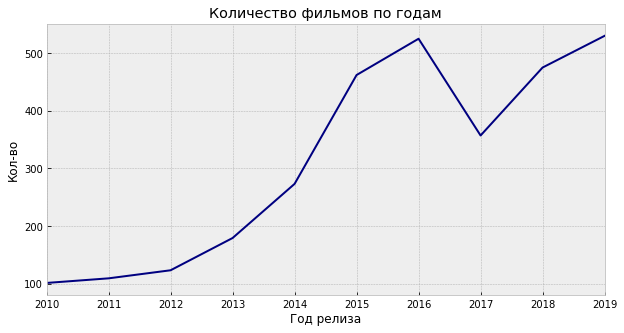

In [44]:
#для наглядности посмотрим на график
plt.style.use('bmh')

(
    films_per_year
        .plot(figsize=(10, 5), colormap='jet', legend=False, title='Количество фильмов по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

Возможно, что на прокат в 2016 году как-то повлиял кризис 2014 года. Фильмов снимали в 2015 меньше, соответственно и выпуск в прокат в 2016-2017 снизился.

 Каковы кассовые сборы по годам?

In [45]:
#выведем сумму сборов по годам
amount_per_year = (
    df_rental[['box_office', 'year']]
        .pivot_table(index='year', values='box_office', aggfunc='sum')
        .sort_values('year', ascending=False)
)
amount_per_year

,box_office
year,
2019,48425708592
2018,49668402949
2017,48563707214
2016,47866299596
2015,39497365062
2014,7444951839
2013,29799704
2012,6955423
2011,14102765


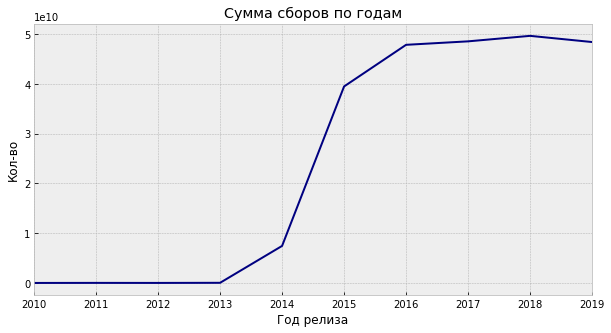

In [46]:
#Посмотрим на графике
plt.style.use('bmh')

(
    amount_per_year
        .plot(figsize=(10, 5), colormap='jet', legend=False, title='Сумма сборов по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

Максимальные сборы были в 2018 году. Минимальные в 2010 году. Люди полюбили походы в кино либо повысилось качество фильмов.

Посчитаем среднюю и медианную сумму сборов для каждого года

In [47]:
#воспользуемся сводной таблицой
df_rental.pivot_table(index='year', values='box_office', aggfunc=('mean', 'median'))

,mean,median
year,,
2010,2.404608e+04,1710.0
2011,1.293832e+05,3000.0
2012,5.654815e+04,6220.0
2013,1.664788e+05,3580.0
2014,2.727089e+07,20400.0
2015,8.549213e+07,5003449.5
2016,9.117390e+07,3915041.0
2017,1.360328e+08,9968340.0
2018,1.045651e+08,8891102.0


Среднее и медиана кассовых сборов для 2015 года, к примеру, составило 85_492_130 рублей и 5_003_449,5 рублей соответственно.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

In [48]:
#выведем список возрастных ограничений
df_rental['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           1082
«18+» - запрещено для детей                880
«12+» - для детей старше 12 лет            537
«6+» - для детей старше 6 лет              388
«0+» - для любой зрительской аудитории     247
Name: age_restriction, dtype: int64

In [49]:
#создадим переменню и сохраним в неё срез по годам
df_period = df_rental.query('2015<=year<=2019')

In [50]:
#с помощью сводной таблицы определим,
#влияет ли возрастное ограничение аудитории  на сборы фильма в прокате в период с 2015 по 2019 год
df_period.pivot_table(index = ['age_restriction'], columns='year', values = 'box_office', aggfunc = ('count', 'sum'))

count                              sum  \
year                                    2015 2016 2017 2018 2019         2015   
age_restriction                                                                 
«0+» - для любой зрительской аудитории    38   41    3    5    3    379054567   
«12+» - для детей старше 12 лет           72   82   41   67   85  13616081989   
«16+» - для детей старше 16 лет          167  181  121  156  178  11368120823   
«18+» - запрещено для детей              132  151  147  179  183   5432308329   
«6+» - для детей старше 6 лет             53   70   45   68   81   8701799354   

                                                                               \
year                                           2016         2017         2018   
age_restriction                                                                 
«0+» - для любой зрительской аудитории    150228839    229598930     32449001   
«12+» - для детей старше 12 лет         12204446503   7851427659  14267291636   
«16+» - для детей старше 16 лет         16664548492  18745042899  16503602284   
«18+» - запрещено для детей              6793929771   9651495581   8760085436   
«6+» - для детей старше 6 лет           12053145991  12086142145  10104974592   

                                                     
year                                           2019  
age_restriction                                      
«0+» - для любой зрительской аудитории     17746066  
«12+» - для детей старше 12 лет         12680198743  
«16+» - для детей старше 16 лет         12753418927  
«18+» - запрещено для детей             10121796238  
«6+» - для детей старше 6 лет           12852548618

Визуализируем влияние возрастного ограничения

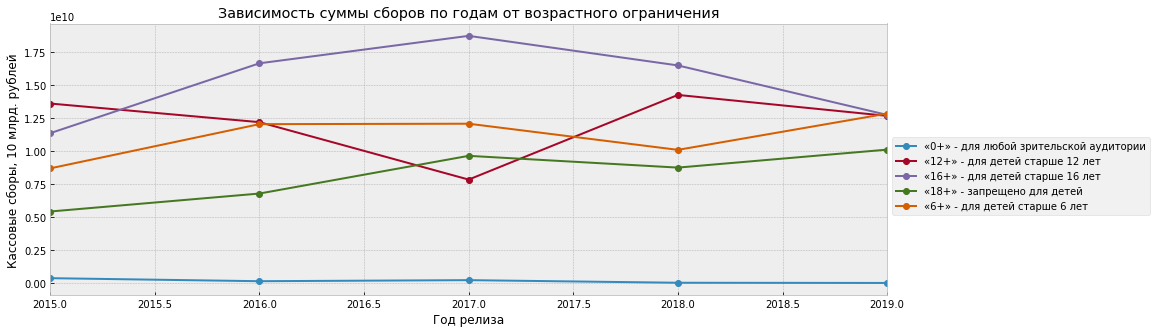

In [51]:
#создадим график зависимости
(
df_period.pivot_table(index=['year'], columns='age_restriction', values='box_office', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(15, 5), title='Зависимость суммы сборов по годам от возрастного ограничения')
    .set(xlabel='Год релиза', ylabel='Кассовые сборы, 10 млрд. рублей')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Визуализируем зависимость суммы кассовых сборов по годам от типа фильма

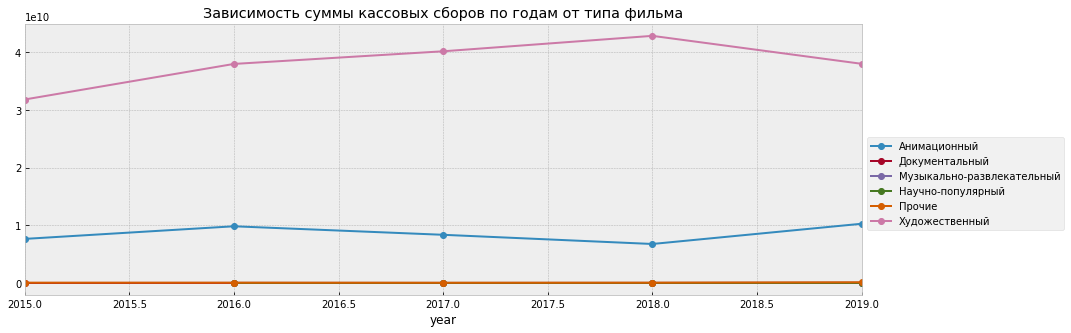

In [52]:
#выедем график через сводную таблицу
(
df_period.pivot_table(index=['year'], columns=['type'], values='box_office', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(15, 5), title='Зависимость суммы кассовых сборов по годам от типа фильма')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Cамые кассовые фильмы - это киноленты с возрастным ограничением "16+". У молодежи больше времени, чем у родителей. Она любит ходить на сеансы по вечерам. Ходят и парочками и большими компаниями. Получается, что самая массовая аудитория - это те, кому уже 16 и более. Да и фильмов для такой категории выпустили больше. Фильмы с нулевой категорией популярностью не пользуются.
Больше всего ходят на художественные фильмы, затем уже на анимационные. Все остальные типы фильмов мало заинтересовали зрителей.

Посмотрим на топ-10  фильмов по кассовым сборам в период с 2015 по 2019 год

In [53]:
#пвыведем топ-10  фильмов 
df_period.nlargest(10, 'box_office')[['title','box_office', 'year', 'age_restriction', 'production_country']]

,title,box_office,year,age_restriction,production_country
7456,Холоп,3073568690,2019,«12+» - для детей старше 12 лет,Россия
5653,Движение вверх,2779686144,2017,«6+» - для детей старше 6 лет,Россия
6820,Мстители: Финал,2576613776,2019,«16+» - для детей старше 16 лет,США
6549,Т-34,2271754004,2018,«12+» - для детей старше 12 лет,Россия
3488,Пираты Карибского моря: Мертвецы не рассказыва...,2118396119,2017,«16+» - для детей старше 16 лет,США
2859,Зверополис,2048126108,2016,«6+» - для детей старше 6 лет,США
3755,Тайная жизнь домашних животных. Миньоны против...,1971005085,2016,«6+» - для детей старше 6 лет,США
6274,Веном,1913257923,2018,«16+» - для детей старше 16 лет,США
7216,Малефисента: Владычица тьмы,1911944865,2019,«6+» - для детей старше 6 лет,США
7258,Джокер,1890368076,2019,«18+» - запрещено для детей,США - Канада


Посмотрим какие жанры собирают большее количество кассовых сборов

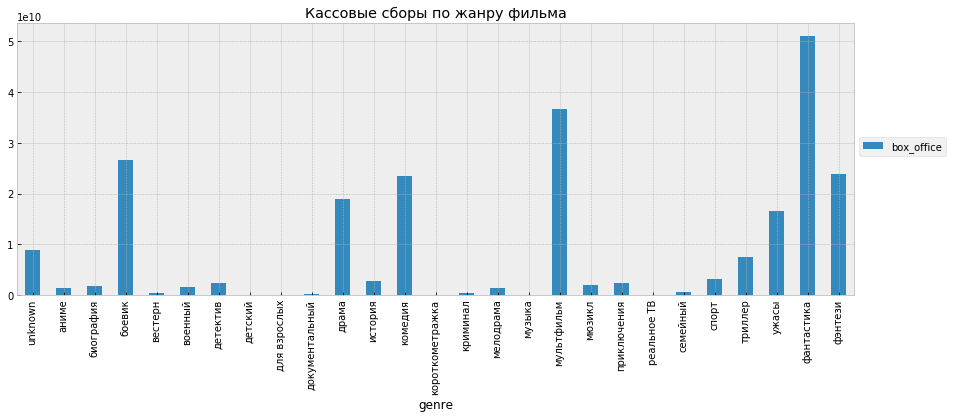

In [54]:
#выведем диаграмму 
(
df_period.pivot_table(index='genre',  values='box_office', aggfunc='sum')
    .plot(kind='bar', grid=True, style='o-', figsize=(15, 5), title='Кассовые сборы по жанру фильма')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

##### Вывод

Доля  фильмов с указанной информацией о прокате в кинотеатрах составляет 41.9%. Такая доля не раскрывает в полной мере картину проката. Многие популярные киноленты не вошли в наш анализ. Необходимо обратить на это внимание Заказчику и его разработчикам.

За период с 2010 год темп прироста выпуска фильма рос, за исключением 2017 года, что скорее всего связано с ограничением  финансовых средств после кризиса 2014 года.

Кассовые сборы год за годом росли. Фильмы стали делать зрелищнее и качественнее, чем заинтересовали зрителей. В 2019 году наблюдался  спад до уровня 2017 года. Но  в целом, динамика положительная по сравнению с 2010-2013 годом. Так среднее суммы сборов за 2013 год составляло 166 478.8 рублей, тогда как уже, к примеру, в 2018 году - 104 565 100 рублей.  Хорошо показывает динамику и медиана. Так в 2010 году – 1710 рублей(хотя, возможно, здесь присутствует тех.ошибка записи данных, о чем писали выше), а в 2019 году – 4627798 рублей. 

Самая кассовая аудитория – это «16+». Зрители больше интересуются художественными фильмами, затем анимационными, а такие, как научные и музыкальные популярностью не пользуются. Сейчас в интернете в открытом доступе много информации, причем бесплатно, и это объясняет заниженный интерес. Очень хорошо характеризует динамику график зависимости суммы сборов по годам от возрастного ограничения. Наблюдаем  подъём сборов с 2015 года до 2017 г. для категории «16+» с дальнейшим спадом до 2019 г. Скорее всего это связано с тем, что с 2017 г. как раз у категории «12+» наблюдается  резкий подъём, что говорит о том, что большинство кинолент снизили жёсткий критерий на возрастное ограничение, чем увеличили свою прибыль. Яркую противоположность показывает категория «0+».  Таких фильмов с каждым годом выпускают в разы меньше. Так в 2016 выпустили 41 киноленту, тогда как в 2019 г. -3.

По кассовым сборам лидируют три российских фильма: «Холоп»(2019 год), «Движение вверх»(2017)  и «Т-34»(2018), обогнав даже Голливуд с его нашумевшими «Мстителями». Жанр "фантастика" лидирует. за ним следует "анимация" и "боевик".


### Исследовательский анализ фильмов, которые получили государственную поддержку


Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выведем еще раз описательную статистику бюджета и сделаем срез, где бюджет больше нуля

In [55]:
#Выведем  статистику бюджета
df['budget'].describe()

count    7.486000e+03
mean     5.828511e+06
std      4.775947e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.305074e+09
Name: budget, dtype: float64

In [56]:
#сделаем срез
df_b = df.query('budget>0')

Выведем по годам какой бюджет у типов фильмов.

In [57]:
#создадим сводную таблицу по типу, году и сумме бюджета
df_b.pivot_table(index='type', columns='year', values='budget', aggfunc='sum')

year,2013,2014,2015,2016,2017,2018,2019
type,,,,,,,
Анимационный,NaN,2.524896e+08,1.230708e+09,7.762987e+08,9.057012e+08,1.468659e+09,1.275568e+09
Документальный,NaN,NaN,NaN,NaN,NaN,NaN,3.300000e+07
Художественный,255435390.0,1.049995e+09,6.507962e+09,6.778644e+09,6.151471e+09,5.532005e+09,1.141430e+10


Самые высокие бюджеты у художественных фильмов.
Посмотрим, как это выглядит на графике.

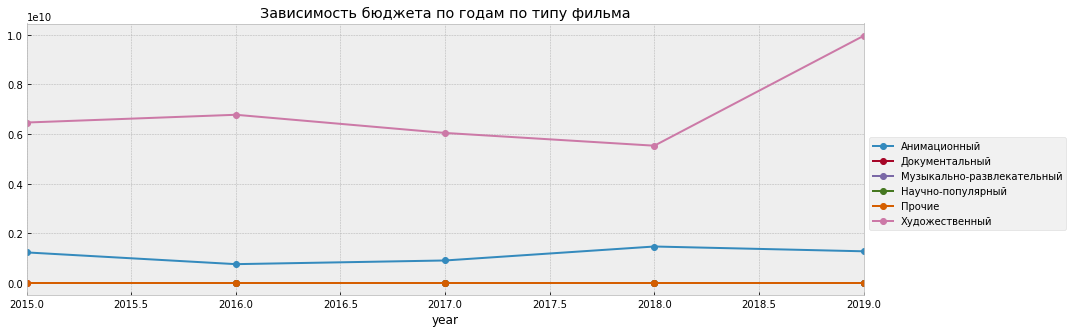

In [58]:
#построим график
(
df_period.pivot_table(index=['year'], columns='type', values='budget', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(15, 5), title='Зависимость бюджета по годам по типу фильма')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Из графика следует, что по прежнему лидируют художественные фильмы, причем с 2018 года визуализируется существенный прирост бюджета на этот тип. За ним следует анимация и прочее без особой какой либо тенденции.

Кто же больше финансирует Министерство Культуры либо Фонд кино? И какая тенденция по годам?

In [59]:
#выведем по годам источники финансирования
df_b.pivot_table(index='financing_source', columns='year', values='budget', aggfunc='sum')

year,2013,2014,2015,2016,2017,2018,2019
financing_source,,,,,,,
Министерство культуры,79411900.0,355098330.0,2.058659e+09,1.689550e+09,8.107928e+08,2.244610e+09,4.237081e+09
"Министерство культуры, Фонд кино",NaN,376498959.0,1.083732e+09,7.014251e+08,1.086532e+08,1.300000e+08,2.490000e+08
Фонд кино,176023490.0,570887494.0,4.596278e+09,5.163967e+09,6.137726e+09,4.626054e+09,8.236785e+09


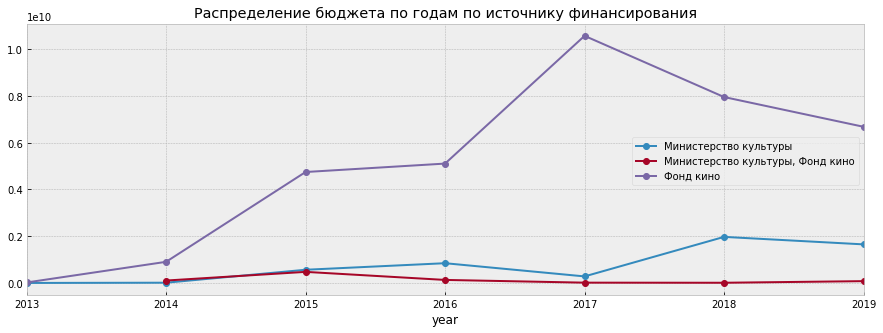

In [60]:
#создадим график распределения бюджета по годам по источнику финансирования
(
df_b.pivot_table(index='year', columns='financing_source', values='box_office', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(15, 5), title='Распределение бюджета по годам по источнику финансирования')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Больше всего финансирует Фонд кино. И в те года, где Фонд кино участвовал меньше (с 2017 по 2018) наблюдается спад, тогда как Министерство культуры спонсировало больше.

Какое количество фильмов по жанрам выпускаются чаще всего? А какие жанры получают больше субсидий? 

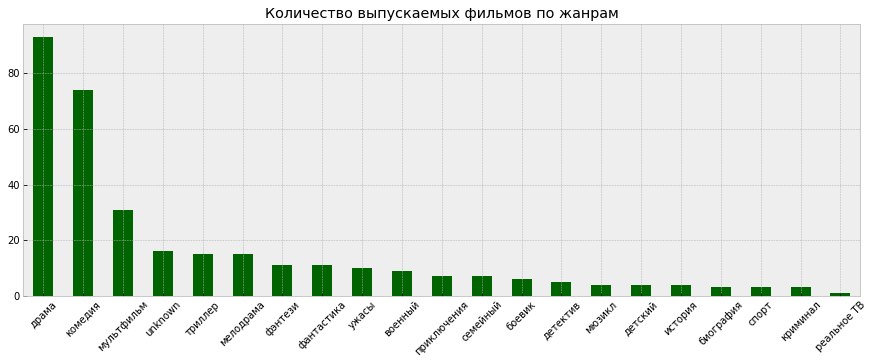

In [61]:
#создадим диаграмму количества выпускаемых фильмов по жанрам
df_b['genre'].value_counts().plot.bar(rot=45, grid=True,
                                      figsize=(15, 5), title='Количество выпускаемых фильмов по жанрам', color='darkgreen')

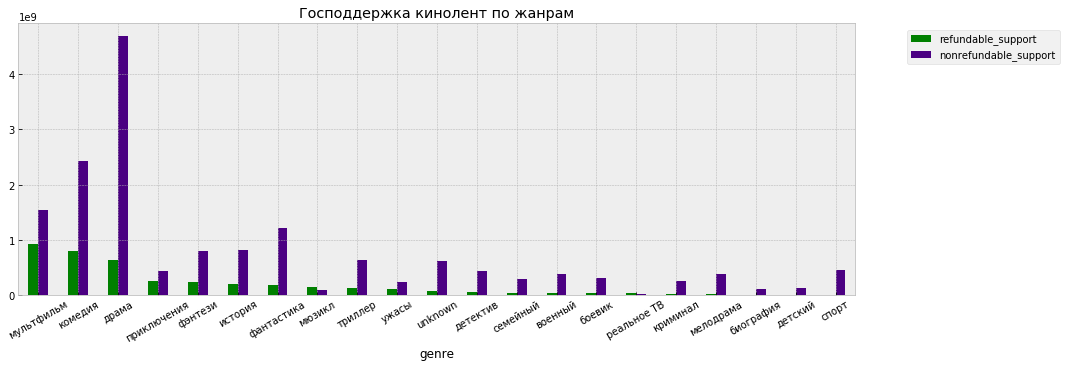

In [62]:
#Посмотрим на гос.субсидии, выделяемые кинолентам по жанру фильма
   
df_b1 = df_b.pivot_table(index=['genre'],
               aggfunc={'refundable_support':'sum',
                        'nonrefundable_support':'sum'}).sort_values(by='refundable_support', ascending=False)


df_b1.plot(kind='bar', y=['refundable_support','nonrefundable_support'], 
                     rot=30, figsize=(15, 5), color=['green', 'indigo'],
                        title='Господдержка кинолент по жанрам'
                       ).legend(loc='lower right', bbox_to_anchor=(1.25, 0.83))


Больше всего выпускают драм, комедий и мультфильмов, субсидии соответственно получают они же.

Каков бюджет у типов фильмов с возрастным ограничением? 

In [63]:
#посмотрим какой бюджет у типов фильмов с возрастным ограничением
df_b.pivot_table(index = ['type'], columns='age_restriction', values = 'budget', aggfunc = ('count', 'sum'))

count  \
age_restriction «0+» - для любой зрительской аудитории   
type                                                     
Анимационный                                       3.0   
Документальный                                     1.0   
Художественный                                     4.0   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
type                                              
Анимационный                                1.0   
Документальный                              NaN   
Художественный                            105.0   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
type                                                                          
Анимационный                                NaN                         NaN   
Документальный                              NaN                         NaN   
Художественный                            125.0                        28.0   

                                               \
age_restriction «6+» - для детей старше 6 лет   
type                                            
Анимационный                             27.0   
Документальный                            NaN   
Художественный                           38.0   

                                                   sum  \
age_restriction «0+» - для любой зрительской аудитории   
type                                                     
Анимационный                               616101040.0   
Документальный                              33000000.0   
Художественный                             253883545.0   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
type                                              
Анимационный                       4.823808e+07   
Документальный                              NaN   
Художественный                     1.553971e+10   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
type                                                                          
Анимационный                                NaN                         NaN   
Документальный                              NaN                         NaN   
Художественный                     1.184159e+10                2.309837e+09   

                                               
age_restriction «6+» - для детей старше 6 лет  
type                                           
Анимационный                     5.245085e+09  
Документальный                            NaN  
Художественный                   7.744791e+09

Для  категории "0+", к примеру, на мультики уходит 616_101_040 рублей, а для "6+"- уже 5_245_085_000 рублей, тогда как на художественные картины- 253_883_545 руб. и 7_744_791_000 руб. соответственно.
Посмотрим, как это выглядит на диаграмме

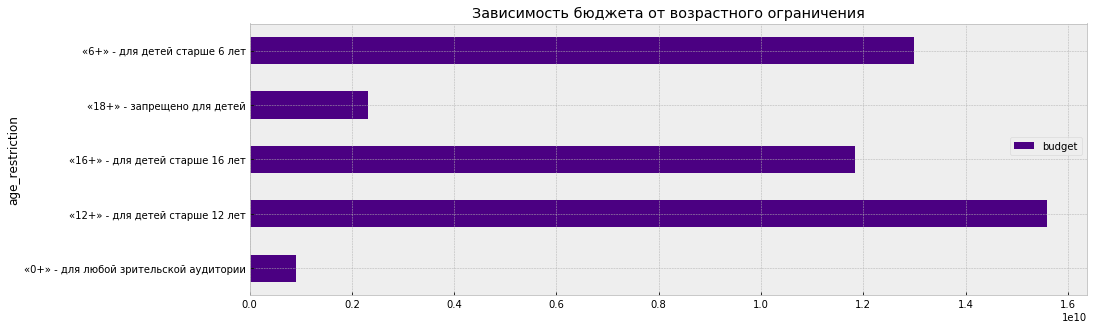

In [64]:
#создадим диаграмму зависимости бюджета от возрастного ограничения
(
df_b.pivot_table(index =['age_restriction'], values='budget', aggfunc=('sum'))
    .plot(kind='barh', grid=True, figsize=(15, 5), title='Зависимость бюджета от возрастного ограничения', color='indigo')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show() 

Большинство бюджета уходит на создание фильмов с возрастной категорией "12+" и "6+".

Посмотрим, как выглядит десятка лидеров среди режиссёров, которые чаще всех получают финансирование

In [65]:
#выведем ТоП-10 лидеров среди режиссёров
df_b.pivot_table(index=['director_name'],
               aggfunc={'budget':'count', 'refundable_support':'sum',
                        'nonrefundable_support':'sum'}).sort_values(by='budget', ascending=False).head(10)

,budget,nonrefundable_support,refundable_support
director_name,,,
Р.Давлетьяров,5,394847945,65000000
С.Андреасян,4,260000000,65000000
Д.Дьяченко,4,180000000,171000000
А.Котт,3,104000000,25000000
Н.Хомерики,3,540000000,120000000
К.Шипенко,3,287000000,25000000
Д.Шмидт,3,115000000,100000000
А.Цицилин,3,200000000,150000000
А.Аксененко,3,65000000,25000000


Какие ж фильмы снимают Р.Давлетьяров, С.Андреасян и Д.Дьяченко? Какой рейтинг у них, кассовые сборы,бюджет и господержка? Выведем эти значения в таблицах ниже.

In [66]:
#выведем фильмы Р.Давлетьярова
df_b.query('director_name=="Р.Давлетьяров"').pivot_table(index=['title','ratings', 'year', 'age_restriction'],
               aggfunc={'budget':'sum', 'refundable_support':'sum',
                        'nonrefundable_support':'sum', 'box_office':'sum'}).sort_values(by='budget', ascending=False).head(10)

,,,,box_office,budget,nonrefundable_support,refundable_support
title,ratings,year,age_restriction,,,,
А зори здесь тихие..._,8.5,2015,«12+» - для детей старше 12 лет,249166767,220588394,100000000,50000000
Невидимки,5.3,2013,«12+» - для детей старше 12 лет,19957031,176023490,107847945,0
Однажды._,7.9,2015,«16+» - для детей старше 16 лет,12748398,156360666,97000000,0
Чистое искусство.,5.9,2015,«16+» - для детей старше 16 лет,6457303,111736163,60000000,15000000
Донбасс. Окраина,6.3,2019,«12+» - для детей старше 12 лет,10933431,105721524,30000000,0


In [67]:
#выведем фильмы Н.Хомерики
df_b.query('director_name=="Н.Хомерики"').pivot_table(index=['title','ratings', 'year', 'age_restriction'],
               aggfunc={'budget':'sum', 'refundable_support':'sum',
                        'nonrefundable_support':'sum', 'box_office':'sum'}).sort_values(by='budget', ascending=False).head(10)

,,,,box_office,budget,nonrefundable_support,refundable_support
title,ratings,year,age_restriction,,,,
Девятая,5.8,2019,«16+» - для детей старше 16 лет,55876887,453704666,300000000,0
Ледокол,6.5,2016,«12+» - для детей старше 12 лет,337069662,430000000,200000000,100000000
Селфи,5.8,2018,«16+» - для детей старше 16 лет,225196400,60000000,40000000,20000000


In [68]:
#выведем фильмы К.Шипенко
df_b.query('director_name=="К.Шипенко"').pivot_table(index=['title','ratings', 'year', 'age_restriction'],
               aggfunc={'budget':'sum', 'refundable_support':'sum',
                        'nonrefundable_support':'sum', 'box_office':'sum'}).sort_values(by='budget', ascending=False).head(10)

,,,,box_office,budget,nonrefundable_support,refundable_support
title,ratings,year,age_restriction,,,,
Салют-7,7.4,2017,«12+» - для детей старше 12 лет,752679777,493733957,225000000,0
Холоп,6.8,2019,«12+» - для детей старше 12 лет,3073568690,160000000,35000000,25000000
Исповедь Z@drota,6.3,2014,«18+» - запрещено для детей,1523750,51196711,27000000,0


Кто же лидер среди кинолент по бюджету с 2015 года по 2019? Создадим таблицу ТОП-10 высокобюджетных и ТОП-10 низкобюджетных.

In [69]:
#Посмотрим на 10-ку с самым высоким бюджетом
(
df_b.pivot_table(index=['title', 'ratings', 'year','age_restriction'], 
               aggfunc={'budget':'sum', 'refundable_support':'sum', 'nonrefundable_support':'sum', 'box_office':'sum'})
    .sort_values(by='budget', ascending=False).head(10)
)

,,,,box_office,budget,nonrefundable_support,refundable_support
title,ratings,year,age_restriction,,,,
Тайна Печати Дракона,5.8,2019,«6+» - для детей старше 6 лет,333597059,2305074303,90000000,180000000
Матильда,7.7,2017,«16+» - для детей старше 16 лет,511775548,1032905957,190000000,110000000
Союз спасения,6.0,2019,«12+» - для детей старше 12 лет,717703185,980000000,400000000,100000000
Вторжение,5.7,2019,«12+» - для детей старше 12 лет,0,944000000,400000000,100000000
Грех,6.9,2019,«16+» - для детей старше 16 лет,54243202,779941965,60000000,0
Дуэлянт,6.6,2016,«16+» - для детей старше 16 лет,364285139,684200536,300000000,150000000
Экипаж .,7.6,2016,«6+» - для детей старше 6 лет,1402255390,635283867,392104482,50000000
Движение вверх,7.5,2017,«6+» - для детей старше 6 лет,2779686144,590192191,400000000,0
Т-34,6.5,2018,«12+» - для детей старше 12 лет,2271754004,563784717,120000000,60000000


In [70]:
#посмотрим на 10-ку самых низкобюджетных
df_b.nsmallest(10, 'budget')[['title','budget', 'year', 'director_name', 'ratings', 'box_office', 'age_restriction']]

,title,budget,year,director_name,ratings,box_office,age_restriction
2874,Помню - не помню!,6000000,2016,В.Ровенский,4.3,15362931,«12+» - для детей старше 12 лет
3139,Я умею вязать,14462464,2015,Н.Степанова при участии С.Иванова,0.0,801370,«16+» - для детей старше 16 лет
7042,Ленин Неизбежность,15010000,2019,В.Хотиненко,5.4,1957979,«16+» - для детей старше 16 лет
5576,Исповедь содержанки,18166418,2017,Е.Жигаева,5.4,270497,«18+» - запрещено для детей
3711,Колобанга. Только для пользователей Интернета ...,18706080,2016,А.Романец,7.0,0,«0+» - для любой зрительской аудитории
2532,Бармен.,20000000,2015,Д.Штурманова,6.2,67418974,«16+» - для детей старше 16 лет
2053,14+,23000000,2014,А.Зайцев,6.6,10234016,«16+» - для детей старше 16 лет
2663,Пионеры-герои.,27000000,2015,Н.Кудряшова,5.9,1109238,«16+» - для детей старше 16 лет
2517,Норвег,28115580,2015,Е.Константинова (псевдоним Алена Званцева),6.3,2323980,«12+» - для детей старше 12 лет
2602,Вакантна жизнь шеф-повара,28571429,2015,Р.Ильясов,6.3,1572434,«16+» - для детей старше 16 лет


А кто же лидер среди фильмов по кассовым сборам  и лидер по окупаемости с 2015 года по 2019? Создадим таблицы ТОП-10 самых-самых.


In [71]:
#выведем 10-ку самых кассовых фильмов
df_b.nlargest(10, 'box_office')[['title','box_office', 'year', 'age_restriction']]

,title,box_office,year,age_restriction
7456,Холоп,3073568690,2019,«12+» - для детей старше 12 лет
5653,Движение вверх,2779686144,2017,«6+» - для детей старше 6 лет
6549,Т-34,2271754004,2018,«12+» - для детей старше 12 лет
5505,Последний богатырь,1655037688,2017,«12+» - для детей старше 12 лет
5708,Лёд,1445731797,2018,«12+» - для детей старше 12 лет
2920,Экипаж .,1402255390,2016,«6+» - для детей старше 6 лет
3565,Притяжение (2016),1038321489,2016,«12+» - для детей старше 12 лет
5641,Ёлки Новые,855451052,2017,«6+» - для детей старше 6 лет
5826,Тренер,820528005,2018,«12+» - для детей старше 12 лет
5659,Три богатыря и принцесса Египта,759226773,2017,«6+» - для детей старше 6 лет


In [72]:
#10-ка самых окупаемых кинолент
df_b.query('box_office>budget').sort_values(by='box_office', ascending=False).head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,genre,director_name
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000,35000000,160000000,Фонд кино,6.8,комедия,3073568690,2019,комедия,К.Шипенко
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0,400000000,590192191,Фонд кино,7.5,"спорт,драма",2779686144,2017,спорт,А.Мегердичев
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000,120000000,563784717,Фонд кино,6.5,"драма,военный,боевик",2271754004,2018,драма,А.Сидоров
5505,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000,50000000,352477575,Фонд кино,6.8,"комедия,фэнтези,приключения",1655037688,2017,комедия,Д.Дьяченко
5708,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000,60000000,148585222,Фонд кино,0.0,unknown,1445731797,2018,unknown,О.Трофим
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000,392104482,635283867,Фонд кино,7.6,"драма,триллер,приключения",1402255390,2016,драма,Н.Лебедев
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,250000000,Фонд кино,5.6,фантастика,1038321489,2016,фантастика,Ф.Бондарчук
5641,Ёлки Новые,111011617,2017-12-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000,50000000,174381922,Фонд кино,5.8,"комедия,мелодрама",855451052,2017,комедия,Д.Киселев
5826,Тренер,111003218,2018-04-19 12:00:00+00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+» - для детей старше 12 лет,0,260000000,390191139,Фонд кино,6.8,"драма,спорт",820528005,2018,драма,Д.Козловский
5659,Три богатыря и принцесса Египта,114003317,2017-12-21 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000,0,174464395,Фонд кино,5.5,"мультфильм,приключения,семейный",759226773,2017,мультфильм,К.Феоктистов


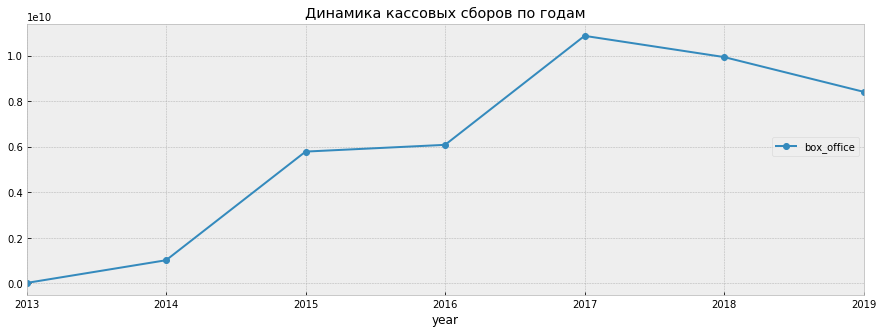

In [73]:
#Посмотрим на динамику кассовых сборов по годами
(
df_b.pivot_table(index='year',  values='box_office', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(15, 5), title='Динамика кассовых сборов по годам')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Динамика кассовых сборов по годам на графике наглядно показала рост, за исключением небольшого спада

Посмотрим на распределение кассовых сборов по возрастному ограничению

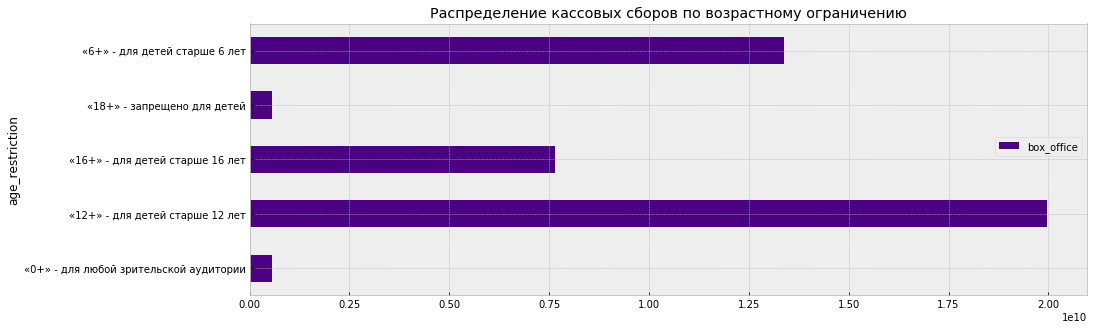

In [74]:
#Построим диаграмму
(
df_b.pivot_table(index='age_restriction',  values='box_office', aggfunc='sum')
    .plot(kind='barh', grid=True, figsize=(15, 5), title='Распределение кассовых сборов по возрастному ограничению', color='indigo')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Раз снимают анимацию и художественные фильмы больше, то и сборы, соответственно, у них больше.

Какие ж жанры среди фильмов с господержкой собирают больше кассовых сборов?

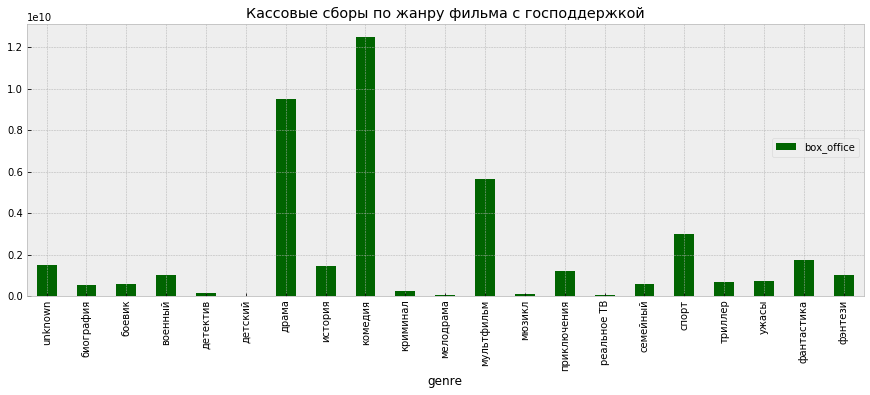

In [75]:
#Построим диаграмму
(
df_b.pivot_table(index='genre',  values='box_office', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(15, 5), title='Кассовые сборы по жанру фильма с господдержкой', color='darkgreen')
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Комедия, драма, мультфильмы и спорт собирают дружно киноманов в зрительном зале.

Как же они оценивают фильмы? Посмотрим рейтинги зрителей.

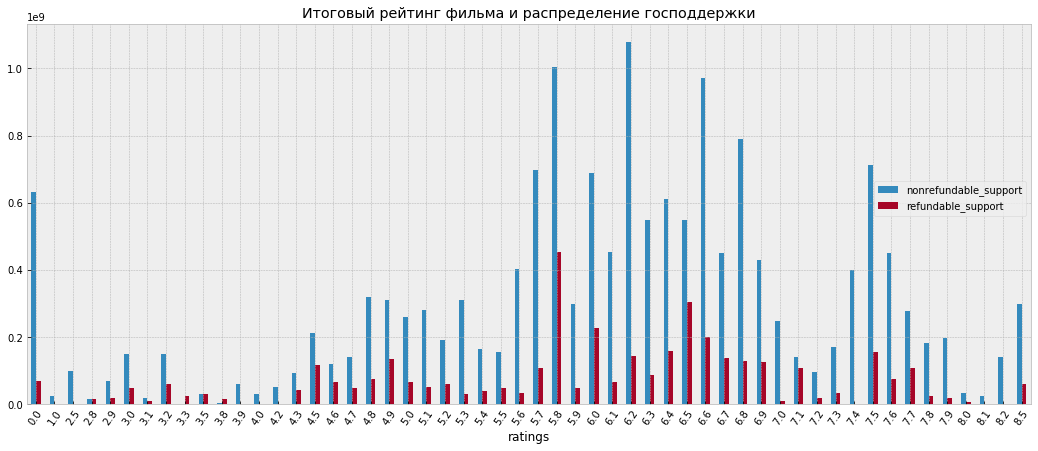

In [76]:
#Построим диаграмму рейтинга субсидированных фильмов
(
df_b.pivot_table(index=['ratings'],
               aggfunc={'refundable_support':'sum',
                        'nonrefundable_support':'sum'})
    .plot(kind='bar',grid=True, figsize=(18, 7), title='Итоговый рейтинг фильма и распределение господдержки', rot=55)
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()


А ведь много фильмов с достаточно хорошим рейтингом. Есть повод начать гордиться нашим кинематографом, если кто еще это не сделал.

И в заключение, глянем на коэффиценты корреляции зависимости рейтинга от господдержки.

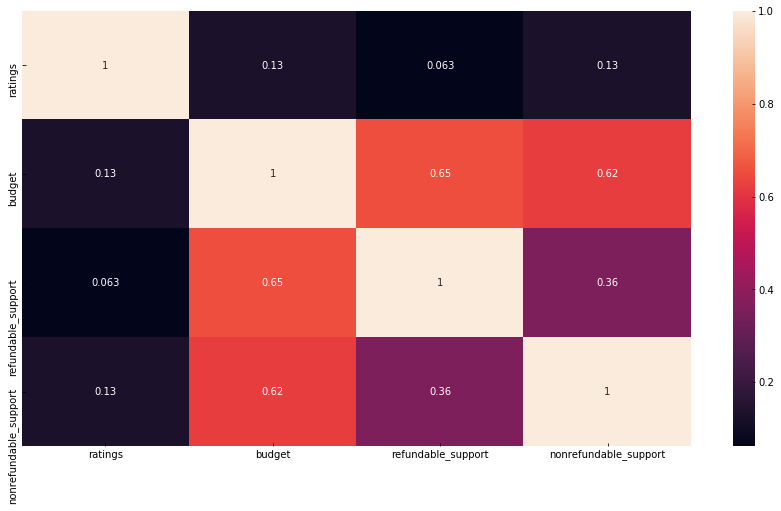

,ratings,budget,refundable_support,nonrefundable_support
ratings,1.000000,0.131359,0.062861,0.130899
budget,0.131359,1.000000,0.654865,0.621026
refundable_support,0.062861,0.654865,1.000000,0.359622
nonrefundable_support,0.130899,0.621026,0.359622,1.000000


In [77]:
columns_corr = ['ratings', 'budget', 'refundable_support', 'nonrefundable_support']
#Отобразим на тепловой карте
plt.figure(figsize=(15,8))
sns.heatmap(df_b[columns_corr].corr(), annot = True)
plt.show()
df_b[columns_corr].corr()

Наиболее сильная корреляция наблюдается между рейтингом и возвратными средствами (коэфф-т корреляции 0,65).

##### Вывод
При исследовательском анализе фильмов, которые получили государственную поддержку, мы выявили, что больше всего спонсируют художественные фильмы и анимацию. Причем существенный прирост финансирования худ.фильмов наблюдается с 2018 года. Скорее всего, выбор типа фильма сказывается тем, что российская анимация значительно проигрывает по сравнению с зарубежными мультфильмами, и вложение в анимацию может быть отрицательным. 

Что касается источника финансирования, то из анализа видно, что в большинстве случаев большие суммы выделяет Фонд кино. Это обуславливается тем, что процесс получения поддержки отличается от Министерства культуры,  т.е. к нему добавляется еще один пункт – возврат денег, полученных от Фонда, тогда как у Министерства фин.средства невозвратные. Соответственно, и к будущей картине требований выдвигается больше: желательно заранее найти прокатчика, медиапартнеров, заложить определенные деньги на проект в бюджете. Также смотрят на имя режиссера, на проведенные кастинги, на репутацию продюсера. Другими словами, все ради одной цели – максимально снизить риски провала в прокате. Ради этой цели так же выпускают больше драм, комедий и анимацию по сравнению с другими типами жанров. Поэтому и коэффициент корреляции зависимости рейтинга от возвратных средств выше, чем у невозвратных.

Возрастная категория предпочтительнее «12+» и «6+» соответственно.

Самые любимые режиссёры гос.поддержки – это Р.Давлетьяров, С.Андреасян  и Д.Дьяченко. Им чаще всех выделяют денежные средства. А вот самые высокобюджетные – это Н.Хомерики  (453 мил.рублей на фильм «Девятая» 2019 г.выпуска с рейтингом 5.8, фильм провалился и не окупился), К.Шипенко(493 мил.рублей на фильм «Салют-7» 2017 года выпуска с рейтингом 7.4, окупился)и Р.Давлетьяров(220 мил. рублей на фильм «А зори здесь тихие» года выпуска с рейтингом 8.5, что не соответствует истинному рейтингу на «Кинопоиске», данный рейтинг взят у одноименного фильма 1972 года, а собственный 7.0, но фильм окупился).
Самые высокобюджетные фильмы: «Тайна Печати Дракона», «Матильда», «Союз спасения», все фильмы не окупились.
Самые низкобюджетные фильмы: «Помню - не помню!», «Я умею вязать», «Ленин Неизбежность». Фильмы не окупились за исключением первого.

Самые кассовые фильмы и самые окупаемые киноленты: «Холоп», «Движение вверх», «Т-34».

Динамика кассовых сборов показывала хорошую тенденцию вплоть до 2017 года. Далее идёт спад до 2019 года. Скорее всего, это обусловлено высокой конкуренцией с зарубежными фильмами, ну или низким качеством фильмов с неактуальной темой. По прежнему в приоритете фильмы для возрастного ограничения «12+», семейные,  детские жанры и мелодрамы.

Рейтинги субсидированные фильмы показывают хорошие. Большее количество от 6.

### Общий вывод

В ходе выполнения проекта обнаружен ряд ошибок, таких, как ошибка записи данных, неверное присвоение рейтинга и номера прокатного удостоверения, пропуски и пробелы в категориальных значениях, отсутствие данных либо неправдоподобные значения по кассовым сборам. Всё это мешает вывести истинную картину для выявления текущих трендов и интереса зрителей к фильмам с государственной поддержкой. 

Для дальнейшего анализа создали три новых столбца, выделив год, главного режиссёра и основной жанр.

Вычислили долю государственной поддержки от общего бюджета фильма. Она составляет 46,3%.
А доля  фильмов с указанной информацией о прокате в кинотеатрах составляет 41.9%. Такая доля не раскрывает в полной мере картину проката. Многие популярные киноленты не вошли в наш анализ. Необходимо обратить на это внимание Заказчику и его разработчикам.


В целом, самая кассовая аудитория – это «12+» и «16+» . Фантастика по мировым сборам лидирует и, российским фильмам, несмотря на то, что пока до зарубежных аналогов далеко, стоит развиваться в этом направлении. Снимать так же больше качественных анимационных картин, мелодрам и боевиков.  Кассовые сборы год за годом росли. Фильмы стали делать зрелищнее и качественнее, чем заинтересовали зрителей. В 2019 году наблюдался спад до уровня 2017 года. Но в целом, динамика положительная по сравнению с 2010-2013 годом. Так среднее суммы сборов за 2013 год составляло 166 478.8 рублей, тогда как уже, к примеру, в 2018 году - 104 565 100 рублей. Хорошо показывает динамику и медиана. Так в 2010 году – 1710 рублей(хотя, возможно, здесь присутствует тех.ошибка записи данных, а в 2019 году – 4 627 798 рублей.
Больше всего финансирует Фонд кино. И в те года, где Фонд кино участвовал меньше (с 2017 по 2018) наблюдается спад, тогда как Министерство культуры спонсировало больше.

Чаще всего выпускают драм, комедии и мультфильмы, субсидии соответственно получают они же.
Для категории "0+", к примеру, на мультики уходит 616_101_040 рублей, а для "6+"- уже 5_245_085_000 рублей, тогда как на художественные картины- 253_883_545 руб. и 7_744_791_000 руб. соответственно
Большинство бюджета уходит на создание фильмов с возрастной категорией "12+" и "6+".
Снимают с помощью господдержки больше анимацию и художественные фильмы, а значит, и сборы, соответственно, у них больше.
Комедия, драма, мультфильмы и спорт собирают дружно киноманов в зрительном зале.
У нашего проката с госсубсидиями много фильмов с достаточно хорошим рейтингом от "6+". Есть повод начать гордиться нашим кинематографом, если кто еще это не сделал.
